In [1]:
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.special import erfinv

import Helper.ImportDatasets
from Helper.ImportDatasets import df_epsilon, df_epsilon_crit

In [2]:
stats.lognorm.cdf(0.44, 0.5)

0.0502990325770261

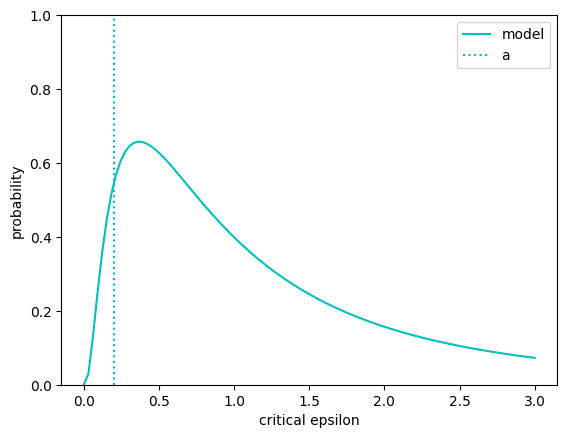

In [46]:
x = np.linspace(0, 3, 100)
plt.plot(x, stats.lognorm.pdf(x, 1), label='model', c = 'c')
#plt.plot(x, stats.lognorm.pdf(x, 0.5), label='model 2', c = 'b')
plt.xlabel('critical epsilon')
plt.ylabel('probability')
plt.axvline(0.2, color='c', linestyle='dotted', label='a')
#plt.axvline(0.44, color='b', linestyle='dotted', label='a model 2')
plt.legend()
plt.ylim(0,1)
plt.savefig('Figures/lognorm_pdf.png', dpi = 800)

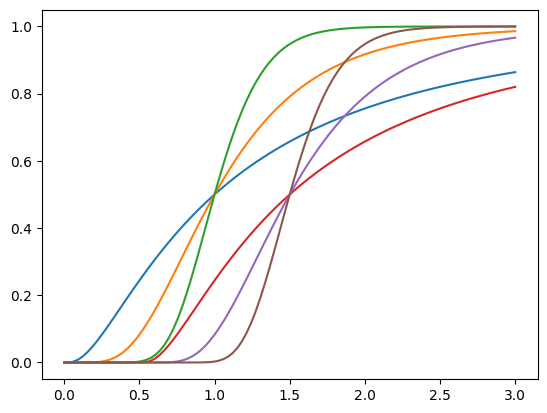

In [11]:
x = np.linspace(0, 3, 100)
plt.plot(x, stats.lognorm.cdf(x, 1))
plt.plot(x, stats.lognorm.cdf(x, 0.5))
plt.plot(x, stats.lognorm.cdf(x, 0.25))
plt.plot(x, stats.lognorm.cdf(x, 1, 0.5))
plt.plot(x, stats.lognorm.cdf(x, 0.5, 0.5))
plt.plot(x, stats.lognorm.cdf(x, 0.25, 0.5))

In [2]:
networks = df_epsilon['network'].unique()

In [3]:
# pick network and test data
df = df_epsilon_crit[(df_epsilon_crit['network'] == networks[0]) & (df_epsilon_crit['ds'] == 'test')]

In [15]:
np.log(0)

C:\Users\lkiel\AppData\Local\Temp\ipykernel_2596\1608527138.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [14]:
s

array([-59.81721442, -59.80505406, -59.79289371, ...,  61.74983126,
        61.76199161,  61.77415197])

In [11]:
erfinv(2*0.05 - 1)*np.sqrt(2)

-1.644853626951473

In [4]:
# We can use scipy to get lognorm cdf and pdf, we want to fins mu and sigma s.t. pdf(a, mu, s) = sigma
def calculate_s(a, sigma, mu):
    return (np.log(a)-mu)/(erfinv(2*sigma - 1)*np.sqrt(2))

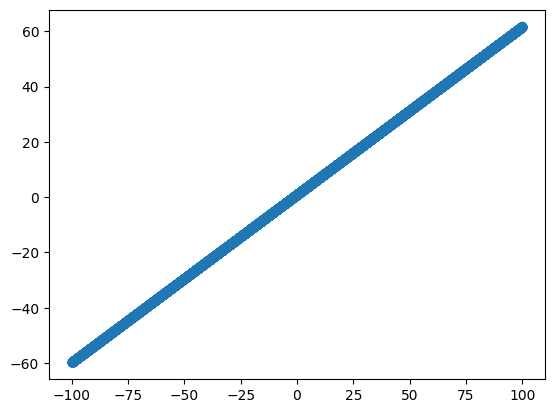

In [13]:
mu = np.linspace(-100,100, 10000)
s = calculate_s(0.2, 0.05, mu)
plt.scatter(mu, s)

Real value to find: 0.8413478010629012
Integral value:  0.8181944773525806
Calculation error: 0.019592300719431258


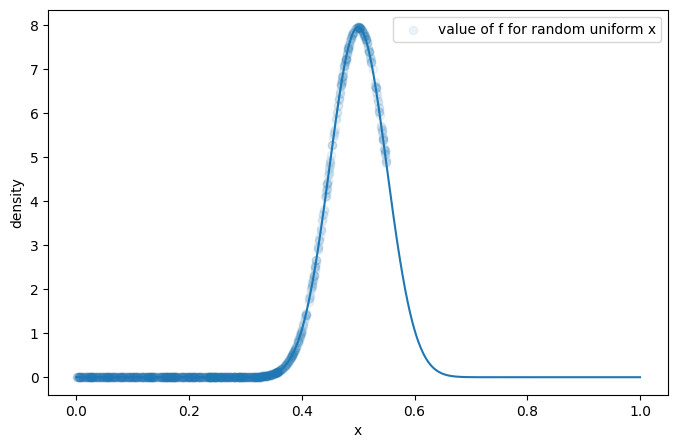

In [5]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

N = 10000
a, b = (50,50)
x_min, x_max = (0, .55)
randx = np.random.uniform(x_min, x_max, N)
y = stats.beta.pdf(randx, a, b)
print(f'Real value to find: {stats.beta(a,b).cdf(.55)}')
print(f'Integral value:  {(x_max-x_min)*y.sum()/N}')
print(f'Calculation error: {np.sqrt((x_max-x_min)*(y*y).sum()/N - (x_max-x_min)*y.mean()**2)/np.sqrt(N)}')

# Plotting 
plt.figure(figsize=(8,5))
x = np.linspace(0, 1, 1000)
plt.plot(x, stats.beta.pdf(x, a, b))
# Then, let's only plot a thousand points for more readability
plt.scatter(randx[:1000], y[:1000], alpha=.08, label='value of f for random uniform x')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()

In [11]:
randx

array([0.47781466, 0.49823858, 0.45129756, ..., 0.52231421, 0.482776  ,
       0.50092036])

In [12]:
y

array([7.22631764, 7.95408529, 4.98870608, ..., 7.21818406, 7.50907806,
       7.95760247])

Real value to find: 1.0
Integral value:  5.656830128464443
Calculation error: 0.021872049766551934


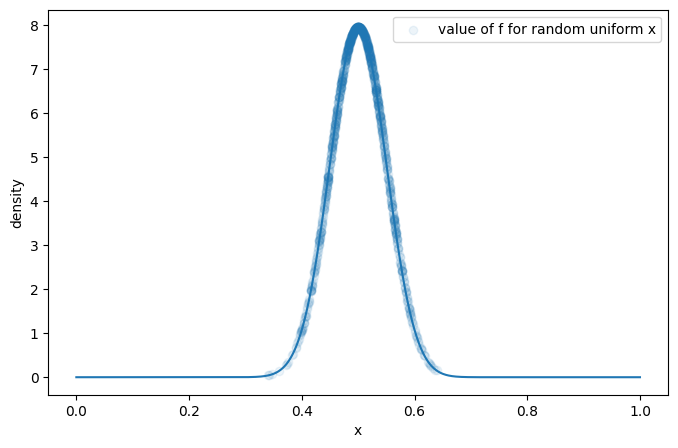

In [10]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

N = 10000
a, b = (50,50)
x_min, x_max = (0, 1)
randx = stats.beta.rvs(a, b, size = N)
y = stats.beta.pdf(randx, a, b)
print(f'Real value to find: {stats.beta(a,b).cdf(1)}')
print(f'Integral value:  {(x_max-x_min)*y.sum()/N}')
print(f'Calculation error: {np.sqrt((x_max-x_min)*(y*y).sum()/N - (x_max-x_min)*y.mean()**2)/np.sqrt(N)}')

# Plotting 
plt.figure(figsize=(8,5))
x = np.linspace(0, 1, 1000)
plt.plot(x, stats.beta.pdf(x, a, b))
# Then, let's only plot a thousand points for more readability
plt.scatter(randx[:1000], y[:1000], alpha=.08, label='value of f for random uniform x')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()